<a href="https://colab.research.google.com/github/Milind-Ranjan/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [28]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [29]:
# Loading the dataset to a pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [30]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [31]:
# add the target column to the dataframe
house_price_dataframe['price'] = house_price_dataset.target

In [32]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
# checking the number of rows and columns in the dataframe
house_price_dataframe.shape

(20640, 9)

In [34]:
# check for missing values
house_price_dataframe.isnull().sum

<bound method DataFrame.sum of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False     False     False   

       Longitude  price  
0          False  False  
1          False  False  
2          False  False  
3          False  False  
4          False  False  
...          ...    ...  
20635      False  False  
20636      False  False  
20637      False  False  
20638      False  False  
20639      False  False  

[20640 rows x 9 columns]>

In [35]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [36]:
correlation = house_price_dataframe.corr()

<Axes: >

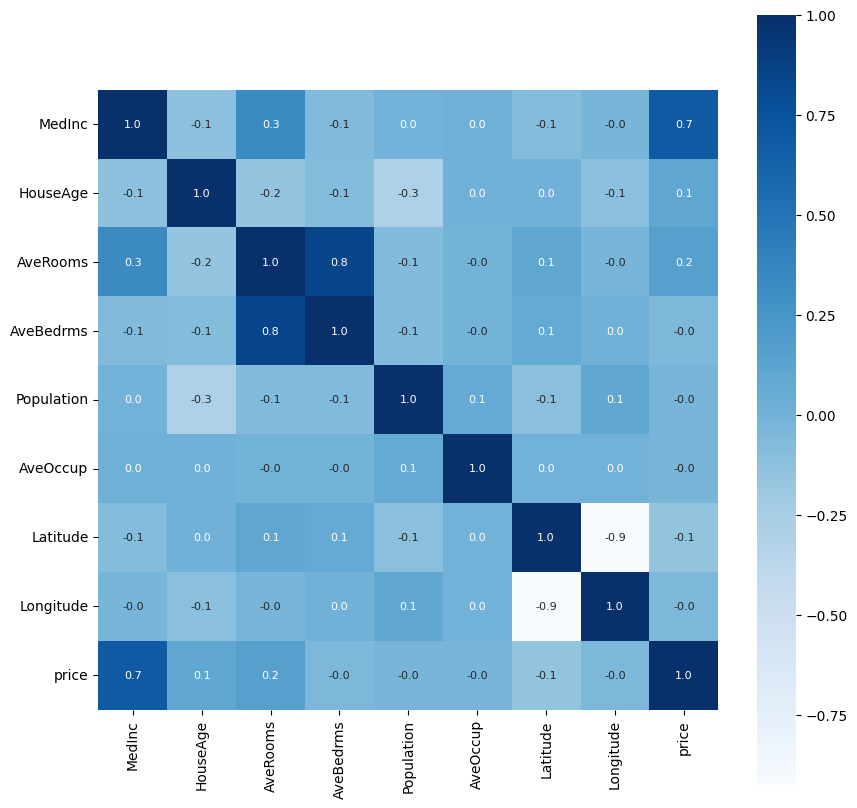

In [37]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [38]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [39]:
print(X,Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)


(20640, 8) (16512, 8) (4128, 8)


In [42]:
# load the model
model = XGBRegressor()

In [43]:
#training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [45]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


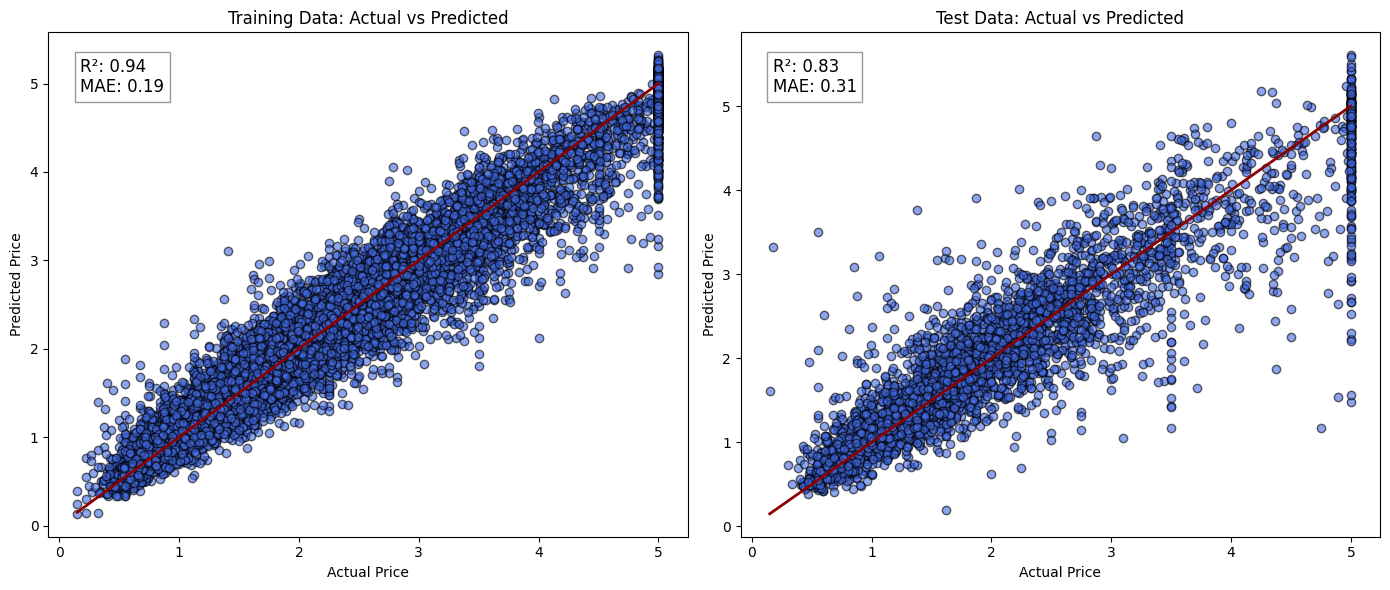

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Define function to plot actual vs predicted values
def plot_actual_vs_predicted(y_actual, y_predicted, title, ax):
    # Calculate metrics
    r2 = metrics.r2_score(y_actual, y_predicted)
    mae = metrics.mean_absolute_error(y_actual, y_predicted)

    # Scatter plot for actual vs predicted
    ax.scatter(y_actual, y_predicted, color='royalblue', edgecolor='k', alpha=0.6)
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color="darkred", lw=2)
    ax.set_xlabel("Actual Price")
    ax.set_ylabel("Predicted Price")
    ax.set_title(title)

    # Display the metrics on the plot
    ax.text(0.05, 0.95, f'R²: {r2:.2f}\nMAE: {mae:.2f}',
            transform=ax.transAxes, verticalalignment='top', fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='grey'))

# Predictions for training and test data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Plotting setup
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Training Data
plot_actual_vs_predicted(Y_train, train_predictions, "Training Data: Actual vs Predicted", axs[0])

# Plot for Test Data
plot_actual_vs_predicted(Y_test, test_predictions, "Test Data: Actual vs Predicted", axs[1])

# Show the plot
plt.tight_layout()
plt.show()